downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


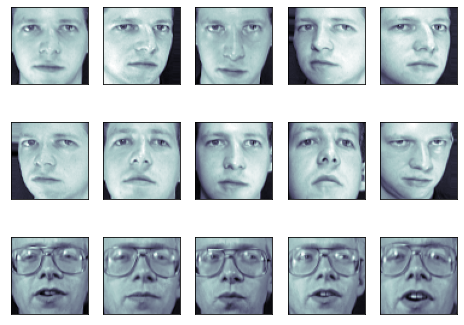

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))

# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

(300, 4096) (100, 4096)


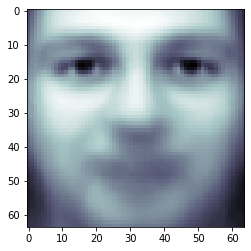

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=97)
print(X_train.shape, X_test.shape)
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)
print(pca.components_.shape)

(300, 150)
(100, 150)


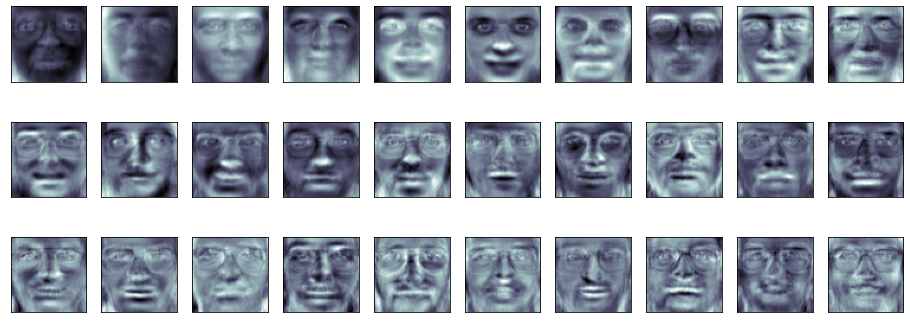

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
 ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
 ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
cmap=plt.cm.bone)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

Text(0.5, 1.0, '35')

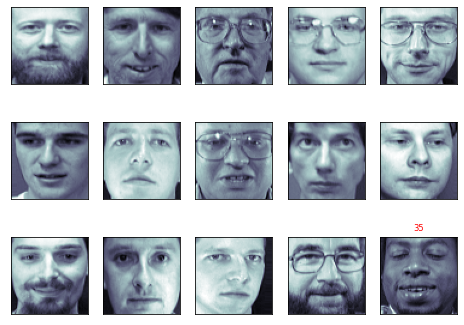

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
 ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
 ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
color = ('black' if y_pred == y_test[i] else 'red')
ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         3
           2       0.40      1.00      0.57         2
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         4
           7       0.29      1.00      0.44         2
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         4
          17       1.00    

In [ ]:
# Exercise: 1.
# Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(faces.data, faces.target, random_state=97)
print(X_train1.shape, X_test1.shape)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)

(300, 4096) (100, 4096)


GaussianNB()

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      1.00      1.00         3
           2       0.33      1.00      0.50         2
           3       1.00      1.00      1.00         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         2
          12       0.40      1.00      0.57         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.75      1.00      0.86         3
          16       1.00      0.50      0.67         4
          17       1.00    

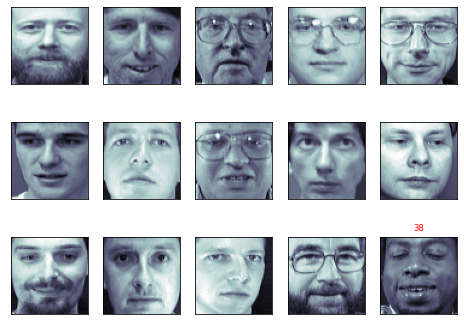

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
 ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
 ax.imshow(X_test1[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

y_pred1 = gnb.predict(X_test1[i, np.newaxis])[0]
color = ('black' if y_pred1 == y_test1[i] else 'red')
ax.set_title(y_pred1, fontsize='small', color=color)
from sklearn import metrics
y_pred1 = gnb.predict(X_test1)
print(metrics.classification_report(y_test1, y_pred1))
print("Precision: ",metrics.precision_score(y_test1, y_pred1, average='micro'))
print("Recall: ",metrics.recall_score(y_test1, y_pred1, average='micro'))

In [ ]:
# ANS:  Performance of the model in 'Naive Bayes + PCA' is better than that in 'Naive Bayes'
# Naive Bayes assumes that all features are important and because of that noise remains in the dataset while PCA reduces the dimension of the dataset meaning it reduces noise in the data

In [ ]:
# Exercise 2.
# Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations.

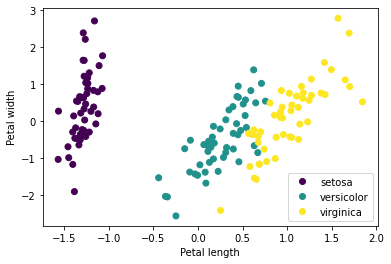

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape
data = iris.data
y=iris.target
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(data)
data_new = pca.transform(data)
plot = plt.scatter(data_new[:,0], data_new[:,1], c=y)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(handles=plot.legend_elements()[0], labels=list(iris['target_names']))
plt.show()

In [ ]:
print("Feature Names:",pca.get_feature_names_out())
print("Score: ",pca.score(data))

Feature Names: ['pca0' 'pca1']
Score:  -3.3213024303347694


In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca)
print(X_test_pca)
print(data_new)

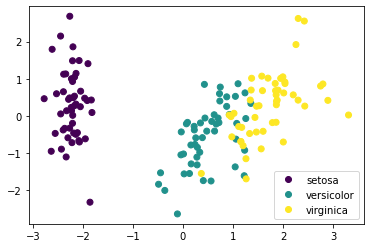

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pca = decomposition.PCA(n_components=2)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(data)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(iris['target_names']))
plt.show()

In [ ]:
# Exercise 3.
# Run PCA + Naive Bayes classifier on IRIS dataset and calculate precision and recall of the system.

(112, 4) (38, 4)
(3, 4)
(112, 3)
(38, 3)


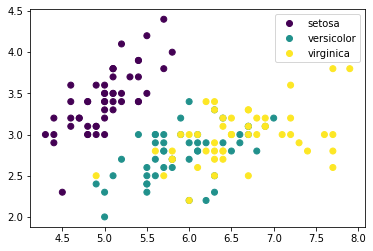

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape
data = iris.data
y=iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, iris.target, random_state=97)
print(X_train.shape, X_test.shape)
from sklearn import decomposition
pca = decomposition.PCA(n_components=3, whiten=True)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)
plot = plt.scatter(data[:,0], data[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(iris['target_names']))
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)),('gnb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall: ",metrics.recall_score(y_test, y_pred, average='micro'))

[[11  0  0]
 [ 0 11  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.82      1.00      0.90        14

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38

Precision:  0.9210526315789473
Recall:  0.9210526315789473


In [ ]:
# Exercise 4.
# Replace Naive Bayes Classifier with Decision Tree Classifier and then Support Vector Machine and compare performance of all three of them.

(112, 4) (38, 4)
(1, 4)
(112, 1)
(38, 1)


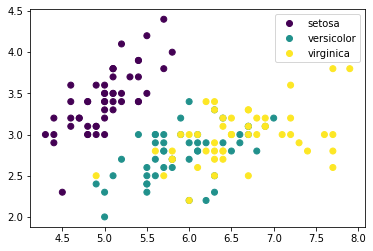

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape
data = iris.data
y=iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, iris.target, random_state=97)
print(X_train.shape, X_test.shape)
from sklearn import decomposition
pca = decomposition.PCA(n_components=1, whiten=True)
pca.fit(X_train)
print(pca.components_.shape)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)
plot = plt.scatter(data[:,0], data[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(iris['target_names']))
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)),('svm', svm.SVC(kernel='linear', C=1))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()
print(metrics.classification_report(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall: ",metrics.recall_score(y_test, y_pred, average='micro'))

[[11  0  0]
 [ 0 11  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.88      1.00      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

Precision:  0.9473684210526315
Recall:  0.9473684210526315
